In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
"""Problem 2
Proszę o pobranie danych ze źródła:
https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks
Zbiór danych dotyczy uzyskanych wzorów w wyniki odbicia sygnałów sonaru od 2 powierzchni: metalowego cylindra (mina) i skały pod różnymi kątami i różnych warunkach. Każdy wzór to zbiór 60 liczb z zakresu 0.0 do 1.0. Każda liczba reprezentuje energię w określonym paśmie częstotliwości. Klasyfikacja powierzchni (etykiety): R (rock) i M (Mine). Zastosować algorytm KNN.

1. Wczytanie danych.
2. Sprawdzenie kompletności danych.
3. Wizualizacja danych - heatmapa korelacji.
4. Wskazanie 5 częstotliwości najbardziej skorelowanych z etykietą powierzchni (wziąć pod uwagę wartości bezwzględne).
5. Podział zbioru na X - cechy (wartości numeryczne), y - etykiety (atrybut decyzyjny), 90% zbioru danych stanowią dane przeznaczone do sprawdzianu krzyżowego, pozostałe 10% danych to zbiór testowy, random_state=42.
6. Stworzenie pipeline odpowiedzialnego za standaryzację danych i tworzenie modelu KNN.
7. Regulacja modelu -> metoda przeszukiwania siatki na pipeline, gdzie słownik param_grid zawiera listę wartości k od 1 do 30, ponadto GridSearchCV ma określone parametry: kroswalidacja jest równa 5, scoring = 'accuracy'.
8. Wytrenowanie modelu.
9. Parametry estymatora.
10. Korzystając ze słownika .cv_results_ stworzyć wykres zależności 'mean_test_score' od liczby najbliższych sąsiadów.
11. Predykcja na zbiorze testowym na podstawie optymalnie dobranych parametrów.
12. Ewaluacja modelu na podstawie raportu z klasyfikacji i macierzy błędów. """

In [8]:
# Krok 1: Wczytanie danych
data = pd.read_csv('sonar.all-data', header=None)

In [30]:
# Zmiana etykiet na wartości liczbowe
label_encoder = LabelEncoder()
data[60] = label_encoder.fit_transform(data[60])

In [31]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [32]:
# Krok 2: Sprawdzenie kompletności danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

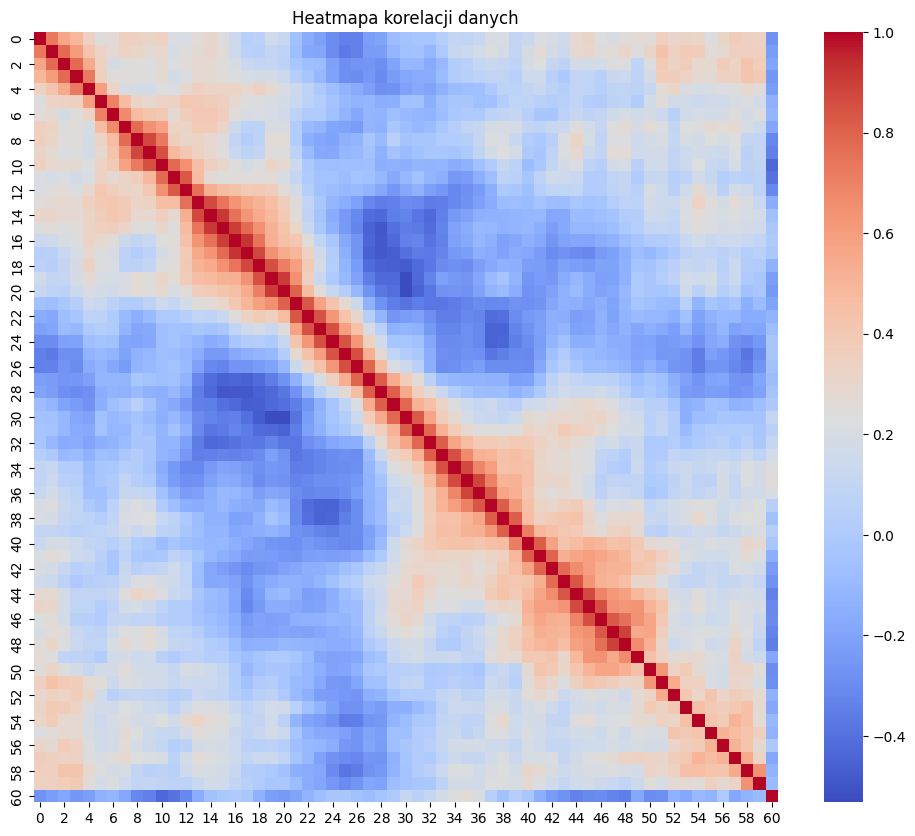

In [13]:
# Krok 3: Wizualizacja heatmapy korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Heatmapa korelacji danych')
plt.show()

In [54]:
# Krok 4: Wskazanie 5 częstotliwości najbardziej skorelowanych z etykietą powierzchni
# Wskazanie 5 częstotliwości najbardziej skorelowanych z etykietą powierzchni
correlations = data.iloc[:, :-1].apply(lambda x: x.corr(data.iloc[:, -1]))
top_correlations = correlations.abs().sort_values(ascending=False).head(5)
print("5 najbardziej skorelowanych częstotliwości:")
print(top_correlations)

5 najbardziej skorelowanych częstotliwości:
10    0.432855
11    0.392245
48    0.351312
9     0.341142
44    0.339406
dtype: float64


In [34]:
# Podział zbioru danych
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [35]:
# Stworzenie pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [36]:
# Zmiana etykiet na wartości liczbowe
label_encoder = LabelEncoder()
data.iloc[:, -1] = label_encoder.fit_transform(data.iloc[:, -1].astype(str))
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [37]:

print(data.iloc[:, -1].unique())


[1 0]


In [38]:
# Regulacja modelu - GridSearch
param_grid = {'knn__n_neighbors': list(range(1, 31))}
grid_model = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [39]:
# Wytrenowanie modelu
optimal_params = grid_model.best_params_
model = KNeighborsClassifier(n_neighbors=optimal_params['knn__n_neighbors'])
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
# Parametry estymatora
print(f"Optymalne parametry estymatora: {optimal_params}")

Optymalne parametry estymatora: {'knn__n_neighbors': 1}


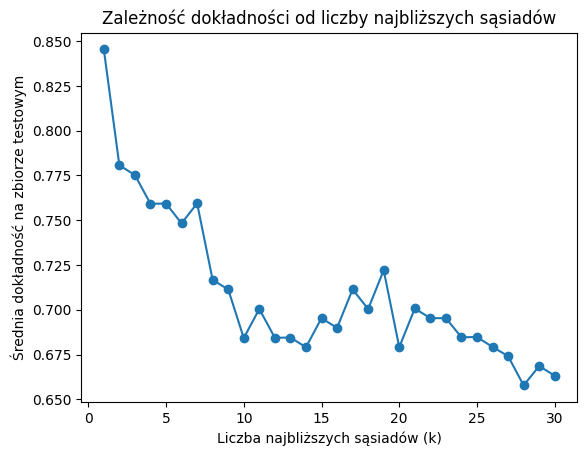

In [44]:
# Wykres zależności 'mean_test_score' od liczby najbliższych sąsiadów
results = pd.DataFrame(grid_model.cv_results_)
plt.plot(results['param_knn__n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Liczba najbliższych sąsiadów (k)')
plt.ylabel('Średnia dokładność na zbiorze testowym')
plt.title('Zależność dokładności od liczby najbliższych sąsiadów')
plt.show()

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 161 to 124
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float64
 1   1       21 non-null     float64
 2   2       21 non-null     float64
 3   3       21 non-null     float64
 4   4       21 non-null     float64
 5   5       21 non-null     float64
 6   6       21 non-null     float64
 7   7       21 non-null     float64
 8   8       21 non-null     float64
 9   9       21 non-null     float64
 10  10      21 non-null     float64
 11  11      21 non-null     float64
 12  12      21 non-null     float64
 13  13      21 non-null     float64
 14  14      21 non-null     float64
 15  15      21 non-null     float64
 16  16      21 non-null     float64
 17  17      21 non-null     float64
 18  18      21 non-null     float64
 19  19      21 non-null     float64
 20  20      21 non-null     float64
 21  21      21 non-null     float64
 22  22    

In [52]:
# Predykcja na zbiorze testowym
X_test_np = np.array(X_test)
y_pred = model.predict(X_test_np)

In [53]:
# Ewaluacja modelu
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))
print("Macierz błędów:\n", confusion_matrix(y_test, y_pred))

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

Macierz błędów:
 [[12  1]
 [ 1  7]]
